In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
train=pd.read_csv("veriler\datathon\\train.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [3]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler

In [4]:
urunler=train["urun"].unique()

In [5]:
urunler

array(['kıyma', 'tavuk', 'hindi', 'Bakla-kuru', 'Bakla-taze', 'Bamya',
       'Barbunya-kuru', 'Bezelye-taze', 'Biber-yeşil', 'Brüksel laha.',
       'Domates', 'Enginar', 'Fasulye-kuru', 'Fasulye-taze', 'Havuç',
       'Salatalık', 'Ispanak', 'Kabak', 'Karnabahar', 'Kereviz-baş',
       'Kırmızı-pancar', 'Lahana', 'Mantar', 'Marul', 'Mercimek-kuru',
       'Nohut', 'Pancar', 'Patates', 'Patlıcan', 'Pazı', 'Pırasa',
       'Semizotu', 'Buğday ekmeği', 'Bulgur', 'Erişte', 'Makarna',
       'Mısır', 'Mısır unu', 'Nişasta', 'Pilav', 'Pirinç unu', 'Şehriye',
       'Tarhana', 'Yulaf unu', 'yumurta', 'beyaz peynir', 'Kaşar peyniri',
       'krema', 'yoğurt', 'sucuk', 'salam', 'sosis', 'tam buğday ekmek',
       'kaymak', 'bal', 'tereyağ', 'Armut', 'Çilek', 'Elma',
       'Erik türleri', 'İncir', 'Karadut', 'Karpuz', 'Kavun', 'Kayısı',
       'Kiraz', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Portakal', 'Şeftali',
       'Üzüm', 'Vişne', 'fındık', 'fıstık', 'kaju', 'badem', 'ceviz'],
      dtype=

In [6]:
#Ürün Bazında 5 Yıl için Aylık Enflasyon Değerinin Hesaplanması

In [7]:
toplam_enflasyon=0
enflasyon=0
for urun in urunler:
    malzeme= train[train['urun'].isin([urun])]
    aylik_enflasyon=malzeme.groupby("tarih").mean()
    aylik_enflasyon=aylik_enflasyon[12:]
    aylik_enflasyon["enflasyon"]=0
    aylik_enflasyon["fark"]=0
    aylik_enflasyon["oran"]=0
    aylik_enflasyon=aylik_enflasyon.drop("besin",axis=1)
    for x in range(47):
        if x==47:
            aylik_enflasyon.iloc[x:y,2:3]=0
        else:
            y=x+1
            z=y+1
            aylik_enflasyon.iloc[x:y,1:2]=aylik_enflasyon.iloc[y:z,0:1].values/aylik_enflasyon.iloc[x:y,0:1].values
            aylik_enflasyon.iloc[x:y,2:3]=aylik_enflasyon.iloc[y:z,0:1].values-aylik_enflasyon.iloc[x:y,0:1].values
            aylik_enflasyon.iloc[x:y,3:4]=(aylik_enflasyon.iloc[x:y,2:3].values*100)/aylik_enflasyon.iloc[x:y,0:1].values
    #toplam_enflasyon=toplam_enflasyon+(aylik_enflasyon["enflasyon"].sum()/46)
#print(toplam_enflasyon)

In [359]:
#Her bir ürün için ortalama aylık enflasyon

In [360]:
#enflasyon=toplam_enflasyon/79
#print(enflasyon)

In [361]:
aylik_enflasyon

,fiyat,enflasyon,fark,oran
tarih,,,,
2017-01-01,22.438333,1.016982,0.381042,1.698173
2017-02-01,22.819375,1.018205,0.415417,1.820456
2017-03-01,23.234792,1.021645,0.502917,2.164498
2017-04-01,23.737708,1.012278,0.291458,1.227828
2017-05-01,24.029167,1.008306,0.199583,0.830588
2017-06-01,24.228750,1.008444,0.204583,0.844383
2017-07-01,24.433333,1.012790,0.312500,1.278990
2017-08-01,24.745833,1.016147,0.399583,1.614750
2017-09-01,25.145417,1.031351,0.788333,3.135098


In [362]:
# 2020 Aralık Ayı verileri

In [363]:
tarih2020=train.iloc[223728:,:]

In [364]:
# 2021 Yılının her ayı için ürün fiyatlarının hesaplanması

In [365]:
ocak2021=tarih2020["fiyat"]*enflasyon
subat2021=ocak2021*enflasyon
mart2021=subat2021*enflasyon
nisan2021=mart2021*enflasyon
mayıs2021=nisan2021*enflasyon
haziran2021=mayıs2021*enflasyon
temmuz2021=haziran2021*enflasyon
agustos2021=temmuz2021*enflasyon
eylul2021=agustos2021*enflasyon
ekim2021=eylul2021*enflasyon
kasim2021=ekim2021*enflasyon
aralik2021=kasim2021*enflasyon

In [8]:
aylik_enflasyon

,fiyat,enflasyon,fark,oran
tarih,,,,
2017-01-01,22.438333,1.016982,0.381042,1.698173
2017-02-01,22.819375,1.018205,0.415417,1.820456
2017-03-01,23.234792,1.021645,0.502917,2.164498
2017-04-01,23.737708,1.012278,0.291458,1.227828
2017-05-01,24.029167,1.008306,0.199583,0.830588
2017-06-01,24.228750,1.008444,0.204583,0.844383
2017-07-01,24.433333,1.012790,0.312500,1.278990
2017-08-01,24.745833,1.016147,0.399583,1.614750
2017-09-01,25.145417,1.031351,0.788333,3.135098


In [9]:
aylik_enflasyon=aylik_enflasyon.iloc[:,:1]

In [10]:
aylik_enflasyon

,fiyat
tarih,
2017-01-01,22.438333
2017-02-01,22.819375
2017-03-01,23.234792
2017-04-01,23.737708
2017-05-01,24.029167
2017-06-01,24.228750
2017-07-01,24.433333
2017-08-01,24.745833
2017-09-01,25.145417


In [11]:
aylik_enflasyon=aylik_enflasyon.reset_index()

In [12]:
from datetime import datetime
con=aylik_enflasyon['tarih']
aylik_enflasyon['tarih']=pd.to_datetime(aylik_enflasyon['tarih'])
aylik_enflasyon.set_index('tarih', inplace=True)


In [13]:
#check datatype of index
aylik_enflasyon.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='tarih', freq=None)

In [14]:
#convert to time series:
aylik_enflasyon = aylik_enflasyon['fiyat']
aylik_enflasyon.head(10)

tarih
2017-01-01    22.438333
2017-02-01    22.819375
2017-03-01    23.234792
2017-04-01    23.737708
2017-05-01    24.029167
2017-06-01    24.228750
2017-07-01    24.433333
2017-08-01    24.745833
2017-09-01    25.145417
2017-10-01    25.933750
Name: fiyat, dtype: float64

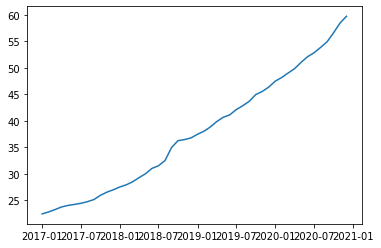

In [15]:
plt.plot(aylik_enflasyon)

In [16]:
import pandas as pd
import glob
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import pacf

<AxesSubplot:xlabel='tarih'>

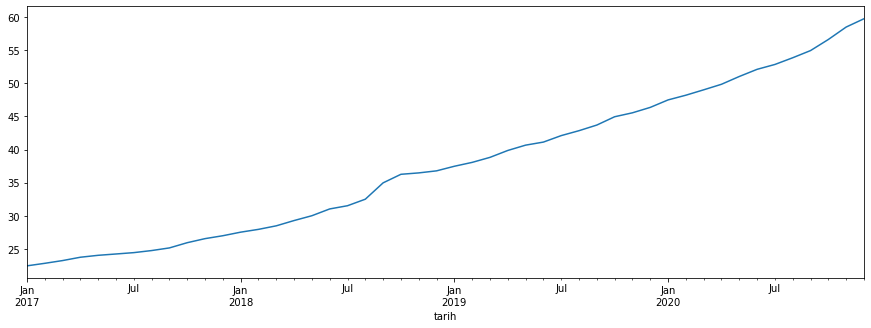

In [17]:
aylik_enflasyon.plot(figsize=(15,5))

In [18]:
TEST_SIZE = 1
train, test = aylik_enflasyon.iloc[:-TEST_SIZE], aylik_enflasyon.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], aylik_enflasyon.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((47,), (47,), (1,), (1,))

In [19]:
train

tarih
2017-01-01    22.438333
2017-02-01    22.819375
2017-03-01    23.234792
2017-04-01    23.737708
2017-05-01    24.029167
2017-06-01    24.228750
2017-07-01    24.433333
2017-08-01    24.745833
2017-09-01    25.145417
2017-10-01    25.933750
2017-11-01    26.546667
2017-12-01    26.985208
2018-01-01    27.523542
2018-02-01    27.946458
2018-03-01    28.480417
2018-04-01    29.277292
2018-05-01    30.005625
2018-06-01    31.029792
2018-07-01    31.514583
2018-08-01    32.500000
2018-09-01    34.969583
2018-10-01    36.260208
2018-11-01    36.470417
2018-12-01    36.779792
2019-01-01    37.472708
2019-02-01    38.058542
2019-03-01    38.815417
2019-04-01    39.857708
2019-05-01    40.660833
2019-06-01    41.122708
2019-07-01    42.100833
2019-08-01    42.844167
2019-09-01    43.694167
2019-10-01    44.947917
2019-11-01    45.543333
2019-12-01    46.360208
2020-01-01    47.488542
2020-02-01    48.200208
2020-03-01    49.013542
2020-04-01    49.850833
2020-05-01    51.026667
2020-06-01

In [20]:
from pmdarima.arima import auto_arima

In [21]:
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=41.431, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=59.152, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=48.010, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=39.451, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=122.758, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=41.434, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=42.435, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=80.250, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.424 seconds


In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -16.726
Date:                Thu, 07 Apr 2022   AIC                             39.451
Time:                        18:36:34   BIC                             44.937
Sample:                             0   HQIC                            41.506
                                 - 47                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7894      0.113      6.977      0.000       0.568       1.011
ma.L1          0.8163      0.071     11.508      0.000       0.677       0.955
sigma2         0.1183      0.028      4.155      0.000       0.062       0.174
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.98
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                             1.05
Prob(H) (two-sided):                  0.24   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# Forecast

prediction, confint = model.predict(n_periods=12, return_conf_int=True)

prediction

array([59.63999909, 60.42939465, 61.21879021, 62.00818577, 62.79758134,
       63.5869769 , 64.37637246, 65.16576802, 65.95516358, 66.74455915,
       67.53395471, 68.32335027])

In [386]:
aylik_enflasyon.tail(12)

tarih
2020-01-01    47.488542
2020-02-01    48.200208
2020-03-01    49.013542
2020-04-01    49.850833
2020-05-01    51.026667
2020-06-01    52.107083
2020-07-01    52.841667
2020-08-01    53.854375
2020-09-01    54.938125
2020-10-01    56.612917
2020-11-01    58.489167
2020-12-01    59.742708
Name: fiyat, dtype: float64

In [387]:
70.69373083/59.742708

1.18330308746634

In [346]:
61.54104742/60.62577908

1.015097015723167

In [347]:
62.09806515/ 61.54104742

1.0090511577776458

In [339]:
63.29648684/62.09806515

1.019298857172203

In [340]:
64.49002248/63.29648684

1.0188562699066852

In [349]:
183/12

15.25